<a href="https://colab.research.google.com/github/Aledelp/Comparative-Image-Noise-Filtering-ClassicVsAI/blob/main/TFG_ALEJANDRO_FFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TFG 2023 - ALEJANDRO DEL POZO

## **Pruebas Transformada de Fourier para funciones prueba usando definición**

Pulso cuadrado:

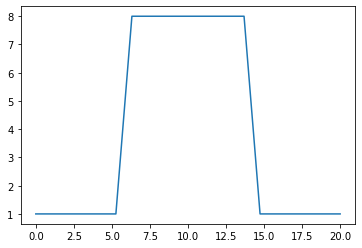

In [ ]:
import numpy as np
from matplotlib import pyplot as mpl
from matplotlib.pyplot import plot,show,xlim,ylim

x= np.linspace(0,20,20)
y= [1,1,1,1,1,1,8,8,8,8,8,8,8,8,1,1,1,1,1,1]



mpl.plot(x,y)
mpl.show()

Introducimos el código que hace la TDF:

In [ ]:
from numpy import zeros
from cmath import exp, pi
def dft(y):
    N=len(y)
    c=np.zeros(N//2 + 1,complex)
    for k in range(N//2+1):
        for n in range(N):
            c[k]+=y[n]*exp(-2j*pi*k*n/N)
    return c

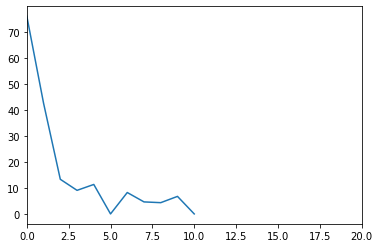

In [ ]:
c = dft(y)
plot(abs(c))
xlim(0,20)
show()

Función seno:

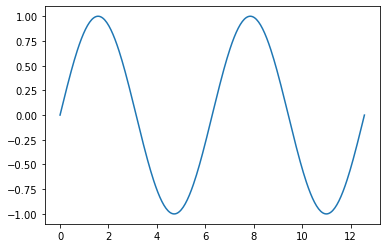

In [ ]:
x= np.linspace(0,4*np.pi,300)
y= np.sin(x)


mpl.plot(x,y)
mpl.show()

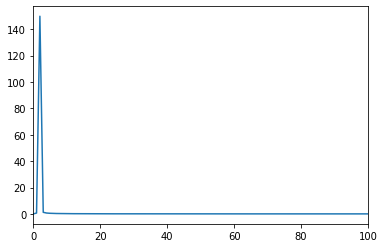

In [ ]:
d = dft(y)
plot(abs(d))
xlim(0,100)
show()

Función gaussiana:

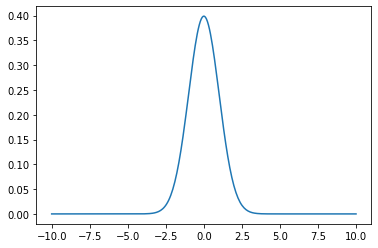

In [ ]:
import scipy as sp
from scipy import stats
x= np.linspace(-10,10,300)
s= stats.norm.pdf(x, 0, 1)



mpl.plot(x,s)
mpl.show()

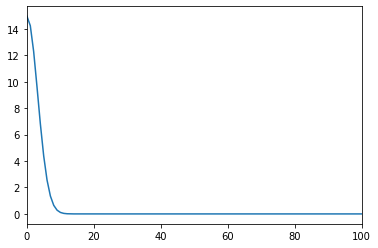

In [ ]:
ms = dft(s)
plot(abs(ms))
xlim(0,100)
show()

In [ ]:
ss = np.fft.ifft(ms)

Simulamos "ruido" como una función de valores aleatorios:

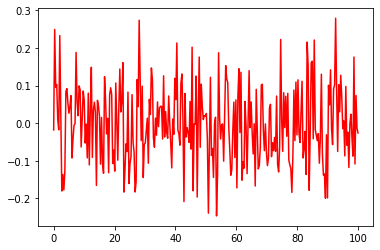

In [ ]:
import random
r =[random.gauss(0,0.1) for i in range(300)]
x= np.linspace(0,100,300)

mpl.plot(x,r,'r')
mpl.show()



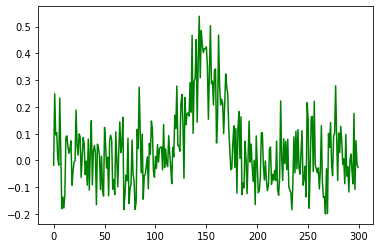

In [ ]:
plot(s+r,'g');

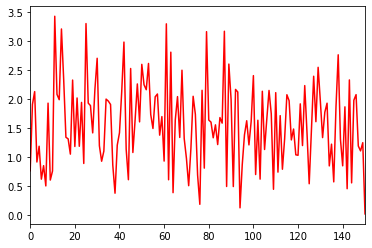

In [ ]:
mr = dft(r)
plot(abs(mr),'r')
xlim(0,150)
show()

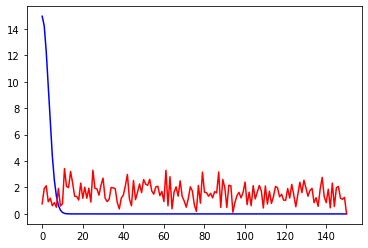

In [ ]:
msr = dft(s+r)
plot(abs(ms),'b')
plot(abs(mr),'r');

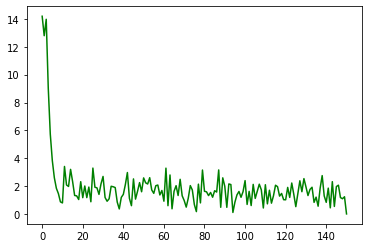

In [ ]:
plot(abs(msr),'g');

ELIMINAMOS TODAS LAS FRECUENCIAS A PARTIR DE UN CIERTO VALOR (DOMINADAS POR EL RUIDO)

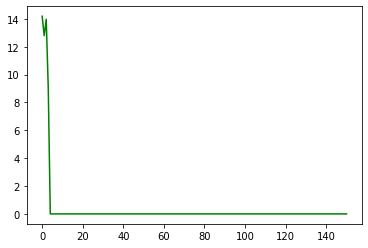

In [ ]:
msr[4:] = 0
plot(abs(msr),'g');

DESHACEMOS LA TRANSFORMADA

A continuación estudiaremos la inversa de la TDF, para ello utilizaremos la función **numpy.fft.ifft** es una función que calcula la transformada discreta de **Fourier inversa de una dimensión**. Es la función inversa de numpy.fft. La función toma un arreglo de entrada y devuelve un arreglo de salida.

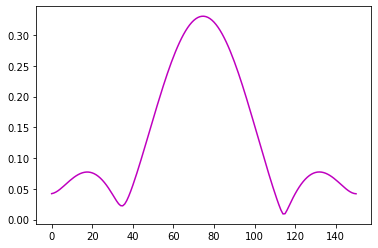

In [ ]:
dmsr = np.fft.ifft(msr)
plot(abs(dmsr),'m');


Como podemos observar, la función obtenida **no es exactamente la gausiana original**. Por un lado porque la **normalización** **no** ha sido **consistente** y en segundo lugar y más importante porque **al haber truncado** msr para eliminar el ruido **hemos** seleccionado y **eliminado frecuencias específicas** si y otras no por lo que eso explica esos "saltos" de la gausiana señal.

## **Pruebas usando libreria FFT**

https://docs.scipy.org/doc/scipy/tutorial/fft.html

VER TAMBIEN 
https://numpy.org/doc/stable/reference/generated/numpy.fft.ifft.html


A continuación, pruebo a hacer la transformada de fourier del primer perfil pero añadiendo ruido, además, esta vez con la librería FFT.


In [ ]:
import numpy as np
from matplotlib import pyplot as mpl
from matplotlib.pyplot import plot,show,xlim,ylim
import random

In [ ]:
len(r)



NameError: ignored

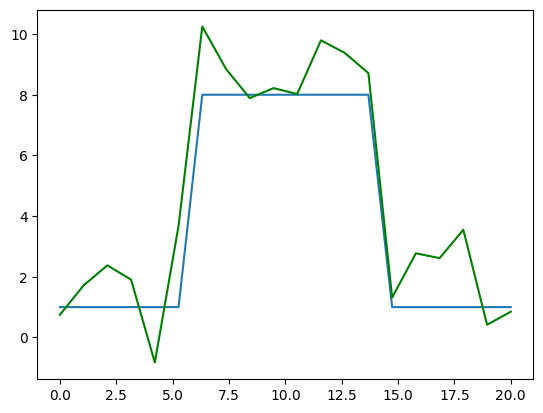

In [ ]:


r =[random.gauss(1,1) for i in range(20)]
a= np.linspace(0,20,20)

x= np.linspace(0,20,20)
esc= [1,1,1,1,1,1,8,8,8,8,8,8,8,8,1,1,1,1,1,1]


escr = np.add(r, esc)


mpl.plot(x,esc)
mpl.plot(a,escr,'g')
mpl.show()



In [ ]:
r

[-0.2533833110093251,
 0.7164388941808638,
 1.376860597210106,
 0.9041110664595853,
 -1.8250429257158398,
 2.681003146168711,
 2.250519599118401,
 0.8518296329812116,
 -0.11097517511400423,
 0.21831624557917073,
 0.023439698286893407,
 1.7938188152483843,
 1.3819814769201848,
 0.712148609672002,
 0.31525159237194944,
 1.7733184201164924,
 1.6152171233638866,
 2.549879744847011,
 -0.5819027846677747,
 -0.15085275452203528]

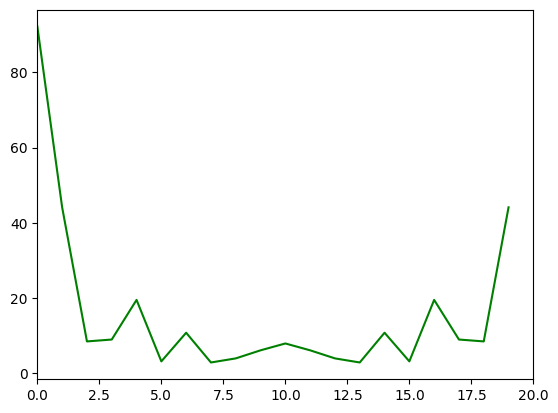

In [ ]:
from scipy.fft import fft
fesc = fft(esc)
fr = fft(r)
fescr = fft(escr)
plot(abs(fescr),'g')
xlim(0,20)
show()

Truncamos ahora los valores de ruido, aproximádamente aquellos de frecuencia inferior a 2 y deshacemos la transformada de fourier

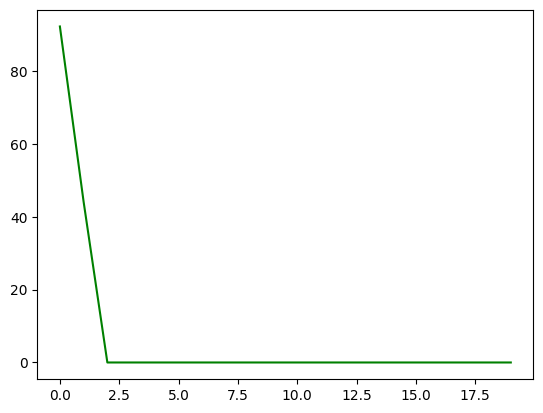

In [ ]:
fescr[2:] = 0
fescrtr=fescr
plot(abs(fescrtr),'g');

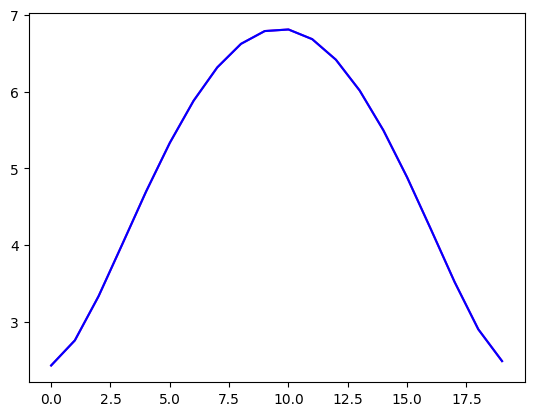

In [ ]:
escrn = np.fft.ifft(fescr)
escrntr = np.fft.ifft(fescrtr)
plot(abs(escrn),'m');
plot(abs(escrntr),'b');
#Recuerda correr la caja anterior al truncado para no perder escr

Podemos probar con el perfil seno de igual manera:

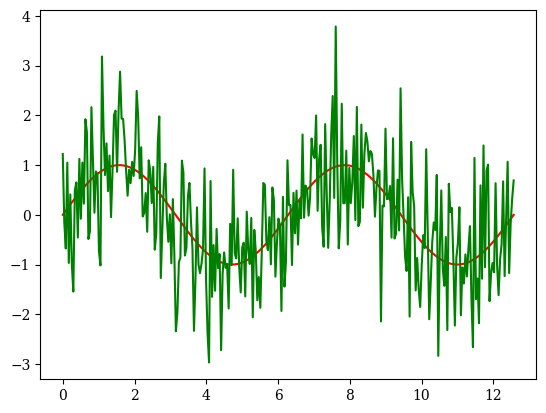

In [ ]:
x= np.linspace(0,4*np.pi,300)
r =[random.gauss(0,1) for i in range(300)]
si= np.sin(x)
mpl.plot(x,si,'r')
mpl.plot(x,np.add(r,si),'g')
mpl.show()


100

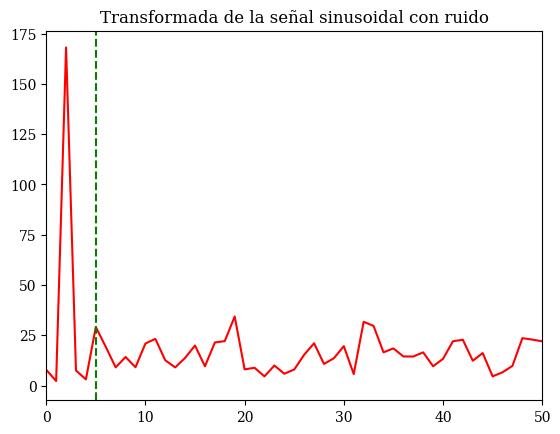

In [ ]:
fsi = fft(si)
fsir = fft(r+si)
#plot(abs(fsi),'r')
plot(abs(fsir),'r')
plt.axvline(x=5, color='g', linestyle='--')
xlim(0,50)
font = {'family': 'serif',
        'color': 'black',
        'weight': 'normal',
        'size': 16,
        }
plt.title('Transformada de la señal sinusoidal con ruido');
show()

Truncamos en 4 aproximadamente y deshacemos la transformada de fourier

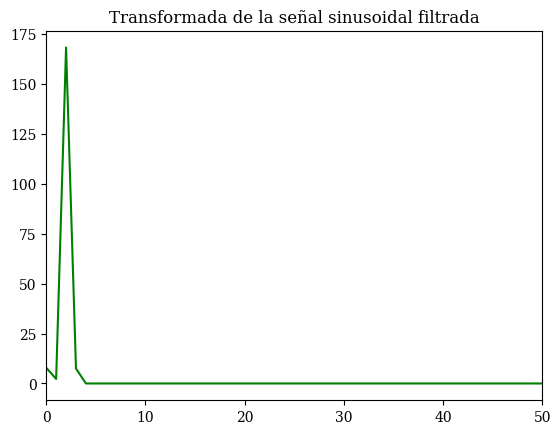

In [ ]:
fsirtr=np.copy(fsir)
fsirtr[4:]=0
plt.xlim(0,50)
plot(abs(fsirtr),'g');
font = {'family': 'serif',
        'color': 'black',
        'weight': 'normal',
        'size': 16,
        }
plt.title('Transformada de la señal sinusoidal filtrada');

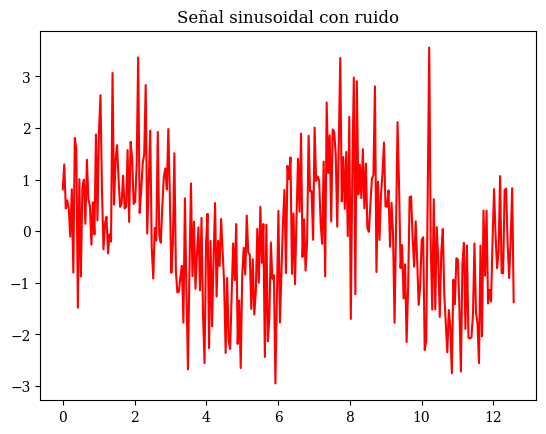

In [ ]:
import matplotlib
matplotlib.rcParams['text.usetex'] = False
si2 = np.fft.ifft(fsir);
sirtr2 = np.fft.ifft(fsirtr);
plot(x,si2,'r')
font = {'family': 'serif',
        'color': 'black',
        'weight': 'normal',
        'size': 16,
        }
plt.title('Señal sinusoidal con ruido');
plt.savefig('Señalconruido.png', dpi=300, bbox_inches='tight')

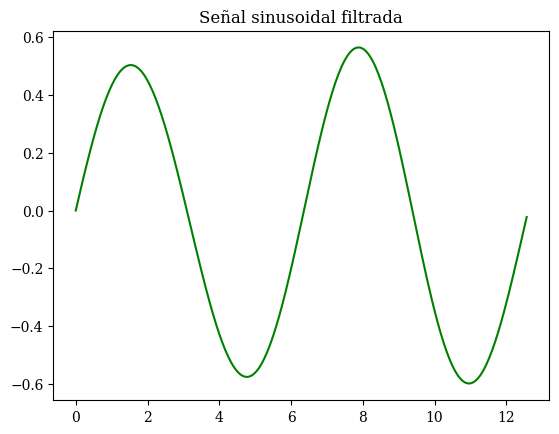

In [ ]:



plot(x,sirtr2,'g');
#plot(x,si,'r');
font = {'family': 'serif',
        'color': 'black',
        'weight': 'normal',
        'size': 16,
        }
plt.title('Señal sinusoidal filtrada');
#Recuerda correr la caja anterior al truncado para no perder fsir

Como podemos comprobar, en azul obtenemos la función seno más o menos recuperada en comparación a si no hubiésemos truncado el ruido, sin embargo no es exáctamente como la original.

# **2D - IMAGENES**


https://github.com/mpizenberg/fft2d

In [ ]:
from __future__ import division             # hace que se utilice la división en punto flotante
import numpy as np                          
import matplotlib.pyplot as plt             
from PIL import Image                      
from numpy.fft import fft2, fftshift, ifft2 


In [ ]:
%matplotlib inline 


Empezamos creando una imagen periódica de tamaño  (601,1201)
 . El periodo,  10.5
 , aparece en la dirección horizontal. En vertical, la imagen es constante:

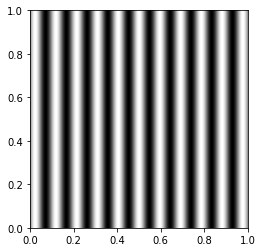

In [ ]:
hW, hH = 600, 300    
hFrec = 10.5     

# Crea una malla en el cuadrado de dimensiones [0,1)x[0,1)
x = np.linspace( 0, 2*hW/(2*hW +1), 2*hW+1)     # columnas (Anchura) (recordamos que linespace es (start,stop, n de puntos))
y = np.linspace( 0, 2*hH/(2*hH +1), 2*hH+1)     # filas    (Altura)

[X,Y] = np.meshgrid(x,y)
A = np.sin(hFrec*2*np.pi*X)

plt.imshow(A, extent=[0,1,0,1], cmap ='gray' ); #Comando para representar en 2D, extent acota el rango y cmap el rango de colores
H,W = np.shape(A)   # Dimensiones de la imagen A


Si entendemos que estamos representando la función  A=f(X,Y)
  como una superficie, un corte por un plano paralelo al plano  OXZ
  de dicha superficie sería

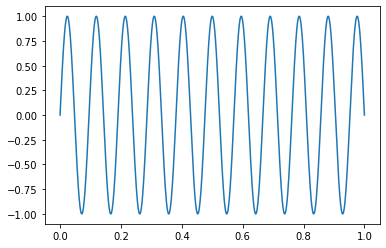

In [ ]:
xx = np.linspace(0,1,1200)
plt.plot(xx,np.sin(hFrec*2*np.pi*xx))
plt.show()

que es una función periódica de frecuencia  f=10.5
  Hz y periodo  T=1/f

In [ ]:
print ("T = ", 1./hFrec)

T =  0.09523809523809523


El paso siguiente es calcular la DFT centrada en el origen y mostrar la figura del espectro de potencia (su raíz cuadrada).

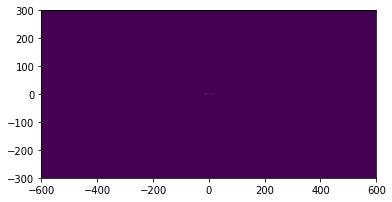

In [ ]:
F = fft2(A)/(W*H)                          
F = fftshift(F)
P = np.abs(F)                            
plt.imshow(P, extent = [-hW,hW,-hH,hH]);

Hacemos zoom (nos acercamos) para ver mejor los valores altos de  P
  a las frecuenccias  ±hFreq. Esto es porque al hacer la transformada vemos que hay mucha indormación que es poco relevante, de hecho ocurre en la mayoría de las imágenes.

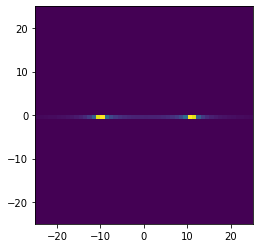

In [ ]:
plt.imshow(P[hH-25:hH+25,hW-25:hW+25], extent=[-25,25,-25,25]); #Aqui los corchetes "slice" la matriz P y de igual manera consideramos el rango con extent

Si cortamos la superficie representada por un plano vertical que contenga el eje  OX
  tenemos

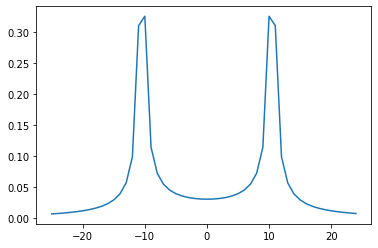

In [ ]:
plt.plot(range(-25,25),P[hH,hW-25:hW+25])
plt.show()
#plt.plot(range(-25,25),P[hH-25:hH+25,hW]) #Esto es en el caso de que quieras un perfil vertical
#plt.show()

Otro ejemplo a partir de la malla anterior

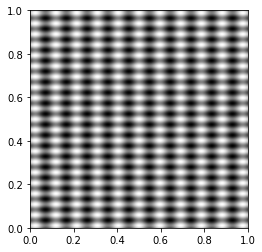

In [ ]:
hFrec = 10.5   # Frecuencia horizontal
vFrec = 20.5   # Frecuencia vertical

A1 = np.sin(hFrec*2*np.pi*X) + np.sin(vFrec*2*np.pi*Y)

plt.figure()
plt.imshow(A1, cmap = 'gray', extent=[0,1,0,1]);

Si cortamos esta superficie por el plano  y=0.5
  tenemos la curva

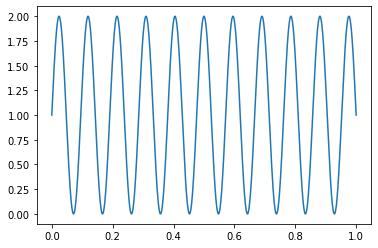

In [ ]:
xx = np.linspace(0,1,1200)
yy = 0.5*np.ones(1200)
plt.plot(xx,np.sin(hFrec*2*np.pi*xx) + np.sin(vFrec*2*np.pi*yy))
plt.show()

y si cortamos por el plano  x=0.5

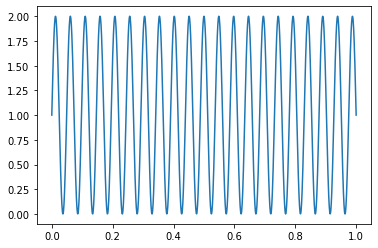

In [ ]:
yy = np.linspace(0,1,1200)
xx = 0.5*np.ones(1200)
plt.plot(yy,np.sin(hFrec*2*np.pi*xx) + np.sin(vFrec*2*np.pi*yy))
plt.show()

Hacemos la TDF

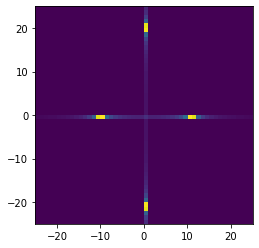

In [ ]:
F1 = fft2(A1)/(W*H)                          
F1 = fftshift(F1) #fftshift reorganiza los elementos de la matriz de forma que las frecuencias que salen de hacer la transformada se organizan de forma más
#intuitiva, con las frecuencias más altas en las esquinas y las más bajas hacia el centro.
P1 = np.abs(F1) #No tengo muy claro porque se hace el valor absoluto

plt.figure()
plt.imshow(P1[hH-25:hH+25,hW-25:hW+25], extent=[-25,25,-25,25]);

Si cortamos la superficie con un plano perpendicular al plano  OXY
  que contiene al eje  OX

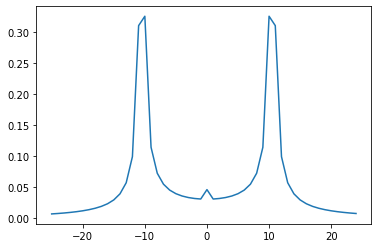

In [ ]:
plt.plot(range(-25,25),P1[hH,hW-25:hW+25])
plt.show()

Y con un plano que contiene a  OY

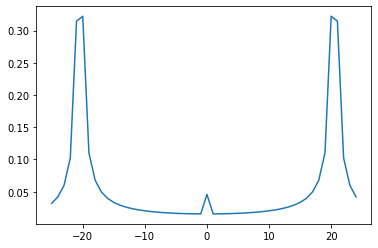

In [ ]:
plt.plot(range(-25,25),P1[hH-25:hH+25,hW])
plt.show()

Otro ejemplo

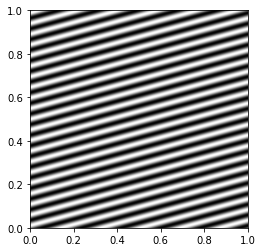

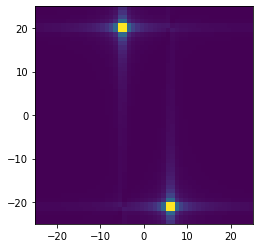

In [ ]:
hFrec = 5.5   # Frecuencia horizontal
vFrec = 20.5   # Frecuencia vertical

A2 = np.sin(hFrec*2*np.pi*X + vFrec*2*np.pi*Y)

plt.figure()
plt.imshow(A2, cmap = 'gray',extent=[0,1,0,1]);

F2 = fft2(A2)/(W*H)                          
F2 = fftshift(F2)
P2 = np.abs(F2)

r = 25
plt.figure()
plt.imshow(P2[hH-r:hH+r,hW-r:hW+r], extent=[-r,r,-r,r]);
#[hH-r:hH+r,hW-r:hW+r]

Finalmente vamos a usar una imagen real de un CT, con una frecuencia alta a lo largo del eje horizontal, lo que se puede ver porque el máximo relativo se alínea con el eje horizontal:

In [ ]:
I = Image.open("EjemploCT.jpeg")
I = I.convert('L')                      # 'L' para convertir a escala de grises
A3 = np.asarray(I, dtype = np.float32)  # Convertimos la imagen I en
                                        # un array Numpy A3 con elementos tipo float32
H,W = np.shape(A3)
plt.imshow(A3, cmap = 'gray');

FileNotFoundError: ignored

In [ ]:
A4 = np.pad(A3,((0,0),(32,32)))

NameError: ignored

In [ ]:
F3 = fft2(A3)/float(W*H)                          
F3 = fftshift(F3)
P3 = np.abs(F3)

#r = 100
#mW = int(np.fix(0.5*W))   # Entero que vale, aproximadamente, la mitad de W
#mH = int(np.fix(0.5*H))   # Entero que vale, aproximadamente, la mitad de H
plt.figure()
plt.imshow(np.log(P3));
#1+P3[mH-r:mH+r,mW-r:mW+r], extent=[-r,r,-r,r]);

Probamos ahora a introducir ruido a alguno de los ejemplos anteriores

In [ ]:
hFrec = 10.5   # Frecuencia horizontal
vFrec = 20.5   # Frecuencia vertical
mean = 0
std = 50
noise = np.random.randn(601,1201) * std + mean

A1 = np.sin(hFrec*2*np.pi*X) + np.sin(vFrec*2*np.pi*Y) + noise

F1 = fft2(A1)/(W*H)                          
F1 = fftshift(F1)
P1 = np.abs(F1) 

plt.figure()
plt.imshow(A1, cmap = 'gray', extent=[0,1,0,1]);
plt.figure()
plt.imshow(P1[hH-25:hH+25,hW-25:hW+25], extent=[-25,25,-25,25]);


De forma que ahora tienes los siguientes cortes:


In [ ]:
plt.plot(range(-25,25),P1[hH,hW-25:hW+25])
plt.show()
plt.plot(range(-25,25),P1[hH-25:hH+25,hW])
plt.show()

Ahora el proceso de filtrado es más complejo que en una dimensión, ya que aunque podríamos aplicar un "filtro pasa bajo" eliminaríamos información relevante.

Probamos de igual manera a añadir ruido al caso del CT

In [ ]:
I = Image.open("EjemploCT.jpeg")
I = I.convert('L')         
mean = 0
std = 50
noise2 = np.random.randn(259,195) * std + mean             
A3 = np.asarray(I, dtype = np.float32) + noise2
                                        
H,W = np.shape(A3)
plt.imshow(A3, cmap = 'gray');
F3 = fft2(A3)/float(W*H)                          
F3 = fftshift(F3)
P3r = np.abs(F3)

plt.figure()
plt.imshow(np.log(P3r));

Añadimos ahora un acceso a las secciones a analizar, así como añadir el paquete que nos permite acceder a los documento stipo DICOM

In [ ]:
!pip install pydicom
import pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.9 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from __future__ import division             # hace que se utilice la división en punto flotante
import numpy as np                          
import matplotlib.pyplot as plt             
from PIL import Image                      
from numpy.fft import fft2, fftshift, ifft2 
import pydicom
from pydicom.data import get_testdata_files
import os


Mounted at /content/drive


Definimos previamente la funcion fft2Dfinal y su inversa. (tanto como para visualización como para procesamiento). 

In [ ]:
def  fft2Dfinal(a):
 b = fft2(a)
 c = fftshift(b)
 return c
def  fft2Dfinalimag(a):
 b = fft2(a)
 c = fftshift(b)
 d = np.abs(c) # Si calculas el valor absoluto, pierdes la información de la fase y por tanto no puedes
 d = np.log(c).astype(float)
 return d
def  ifft2Dfinal(m):
 b = np.fft.ifft2(m)
 return b

In [ ]:
!pip install -qq dcm2niix

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 451.4/451.4 KB 11.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
!dcm2niix -z y -o '/content/drive/My Drive/TFG ALEJANDRO/PETIma/' -full nifty '/content/drive/My Drive/TFG ALEJANDRO/PETIma/01122021_1_20211201_164050/Full_dose/'

Chris Rorden's dcm2niiX version v1.0.20220505  GCC9.4.0 x86-64 (64-bit Linux)
Found 644 DICOM file(s)
Convert 644 DICOM as /content/drive/My Drive/TFG ALEJANDRO/PETIma/niftyl (440x440x644x1)
Conversion required 39.785232 seconds (8.777839 for core code).


In [ ]:
!dcm2niix -z y -o '/content/drive/My Drive/TFG ALEJANDRO/PETIma/' -med nifty '/content/drive/My Drive/TFG ALEJANDRO/PETIma/01122021_1_20211201_164050/1-20 dose/'

Chris Rorden's dcm2niiX version v1.0.20220505  GCC9.4.0 x86-64 (64-bit Linux)
Found 644 DICOM file(s)
Convert 644 DICOM as /content/drive/My Drive/TFG ALEJANDRO/PETIma/1-20_dose_PET_WB_TrueX_TOF_440_G2_Faktor_20_20211201130645_13h (440x440x644x1)
Conversion required 42.376136 seconds (13.627524 for core code).


In [ ]:
!dcm2niix -z y -o '/content/drive/My Drive/TFG ALEJANDRO/PETIma/' -low nifty '/content/drive/My Drive/TFG ALEJANDRO/PETIma/01122021_1_20211201_164050/1-2 dose/'

Chris Rorden's dcm2niiX version v1.0.20220505  GCC9.4.0 x86-64 (64-bit Linux)
Found 645 DICOM file(s)
1 images have identical time, series, acquisition and instance values. DUPLICATES REMOVED.
UINT16->INT16 Future release will change default. github.com/rordenlab/dcm2niix/issues/338
Convert 644 DICOM as /content/drive/My Drive/TFG ALEJANDRO/PETIma/1-2_dose_PET_WB_TrueX_TOF_440_G2_Faktor_2_20211201130645_10h (440x440x644x1)
Conversion required 26.135556 seconds (8.791517 for core code).


In [ ]:
!ls '/content/drive/My Drive/TFG ALEJANDRO/PETIma/'

01122021_1_20211201_164050
1-20_dose_PET_WB_TrueX_TOF_440_G2_Faktor_20_20211201130645_13a.json
1-20_dose_PET_WB_TrueX_TOF_440_G2_Faktor_20_20211201130645_13a.nii.gz
1-20_dose_PET_WB_TrueX_TOF_440_G2_Faktor_20_20211201130645_13b.json
1-20_dose_PET_WB_TrueX_TOF_440_G2_Faktor_20_20211201130645_13b.nii.gz
1-20_dose_PET_WB_TrueX_TOF_440_G2_Faktor_20_20211201130645_13c.json
1-20_dose_PET_WB_TrueX_TOF_440_G2_Faktor_20_20211201130645_13c.nii.gz
1-20_dose_PET_WB_TrueX_TOF_440_G2_Faktor_20_20211201130645_13d.json
1-20_dose_PET_WB_TrueX_TOF_440_G2_Faktor_20_20211201130645_13d.nii.gz
1-20_dose_PET_WB_TrueX_TOF_440_G2_Faktor_20_20211201130645_13e.json
1-20_dose_PET_WB_TrueX_TOF_440_G2_Faktor_20_20211201130645_13e.nii.gz
1-20_dose_PET_WB_TrueX_TOF_440_G2_Faktor_20_20211201130645_13f.json
1-20_dose_PET_WB_TrueX_TOF_440_G2_Faktor_20_20211201130645_13f.nii.gz
1-20_dose_PET_WB_TrueX_TOF_440_G2_Faktor_20_20211201130645_13g.json
1-20_dose_PET_WB_TrueX_TOF_440_G2_Faktor_20_20211201130645_13g.nii.gz
1-20_do

In [ ]:
import nibabel as nib

In [ ]:
full = nib.load('/content/drive/My Drive/TFG ALEJANDRO/PETIma/niftya.nii.gz')
med = nib.load('/content/drive/My Drive/TFG ALEJANDRO/PETIma/niftyb.nii.gz')
low = nib.load('/content/drive/My Drive/TFG ALEJANDRO/PETIma/niftyc.nii.gz')


Por favor, escoge que sección quieres analizar : 100
Por favor, escoge qué tipo de filtrado quieres, g si gausiano, p si de poisson, w si wiener: w
SNR1 = 1035263.5446372959
SNR2 = 26069379.946147222
SNR3 = 19485678672.224422
Entrada no válida. Inténtalo de nuevo.


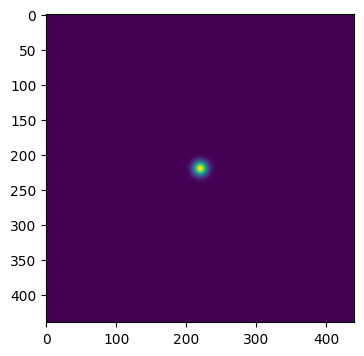

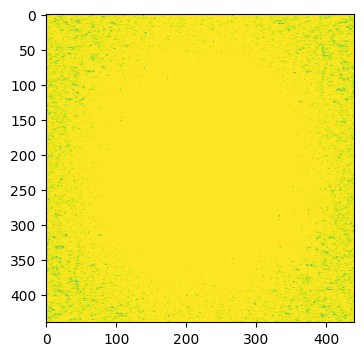

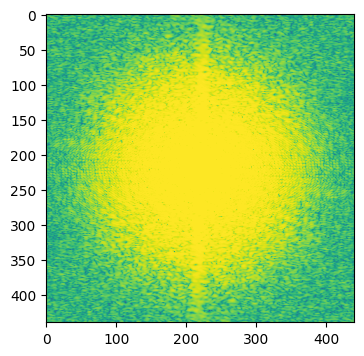

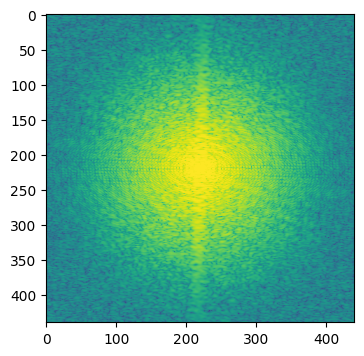

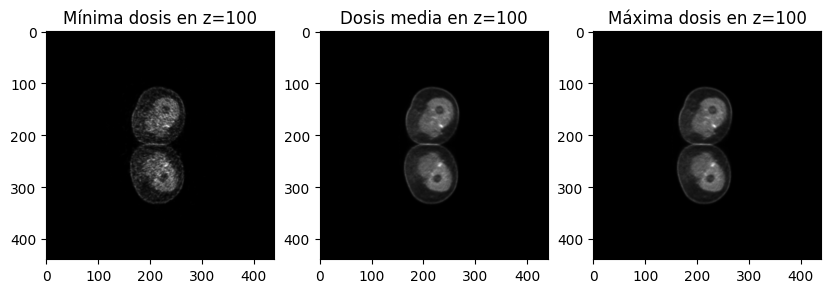

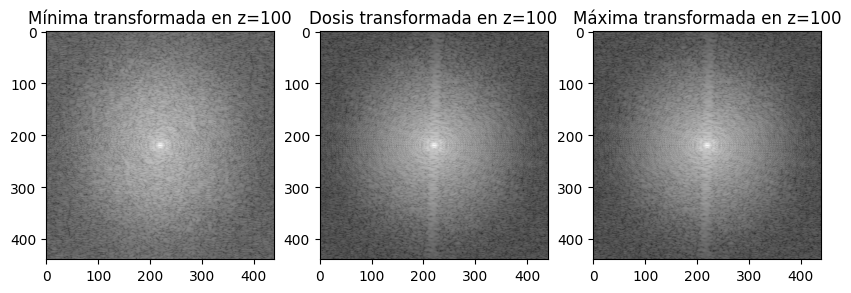

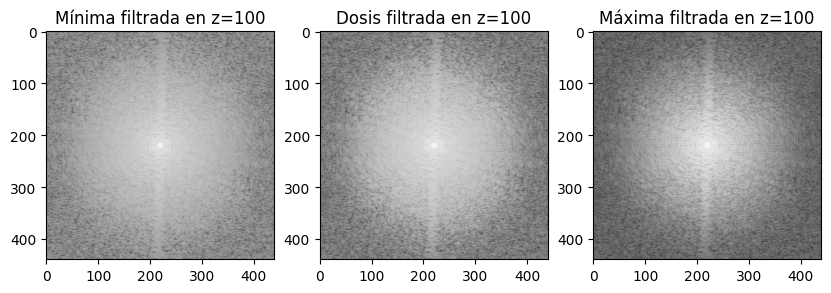

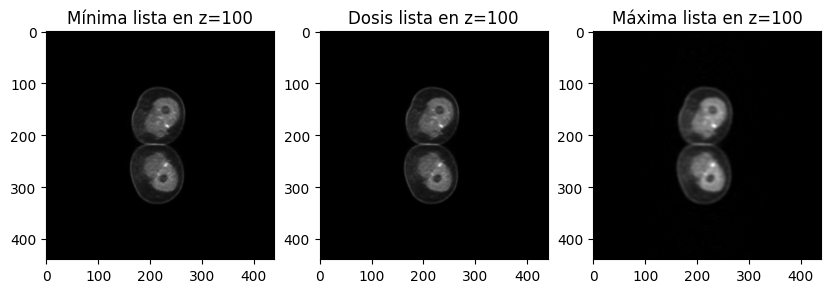

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# Cargar la imagen
#img = nib.load('/content/drive/My Drive/TFG ALEJANDRO/PETIma/nifty.nii.gz')

# Obtener los datos de la imagen como un array NumPy
ful = full.get_fdata()
me = med.get_fdata()
lo = low.get_fdata()

# Seleccionar diferentes componentes en diferentes z
z = input("Por favor, escoge que sección quieres analizar : ")
z = int(z)  # convierte la cadena introducida por el usuario a un entero

# Obtener las secciones correspondientes en cada z
seccion1 = ful[:,:,z]
seccion2 = me[:,:,z]
seccion3 = lo[:,:,z]


#Hacemos la transformada para analizarla
Seccion1transf = fft2Dfinal(seccion1)
Seccion2transf = fft2Dfinal(seccion2)
Seccion3transf = fft2Dfinal(seccion3)                   
Seccionestransf = [Seccion1transf,Seccion2transf,Seccion3transf]
H,W = np.shape(Seccion1transf)
mW = int(np.fix(0.5*W))   # Entero que vale, aproximadamente, la mitad de W
mH = int(np.fix(0.5*H))   # Entero que vale, aproximadamente, la mitad de H
#Definimos la gausiana
nx = np.shape(Seccion1transf)[0]
ny = np.shape(Seccion1transf)[1]
lx = np.arange(nx)
ly = np.arange(ny)
[xx,yy] = np.meshgrid(lx,ly)
sigma=7
x0=nx/2
y0=ny/2
gausiana = np.exp(-0.5*((xx-x0)**2+(yy-y0)**2)/sigma**2)
plt.figure(figsize = (4,4))
plt.imshow(gausiana)



#Definimos la función para aplicar el filtro de Wiener
import scipy.fftpack as fftpack
def wiener_filter_2d(image, noise_variance):
    image_power_spectrum = np.abs(image) ** 2

    wiener_filter = image_power_spectrum / (image_power_spectrum + noise_variance)
    filtered_image = image * wiener_filter
    return filtered_image

#Definimos una función alternativa para mostrar un plot del filtro solamente
def ilustrativowiener_filter_2d(image, noise_variance):
    image_power_spectrum = np.abs(image) ** 2

    wiener_filter = image_power_spectrum / (image_power_spectrum + noise_variance)
    filtered_image = image * wiener_filter
    return wiener_filter
#Se puede usar cuando asumimos que no hay correlación entre la señal y el ruido

#Definimos la distribución de poisson
from scipy.special import factorial

mu = 90  # parámetro de la distribución de Poisson
alpha = 50  # factor de escala para ajustar la amplitud de la distribución

lx = np.arange(np.shape(seccion1)[0])
ly = np.arange(np.shape(seccion1)[1])
[xx, yy] = np.meshgrid(lx, ly)
poisson = alpha * np.exp(-mu) * mu**(xx+yy) / (factorial(xx) * factorial(yy))



#Establecemos ahora la transformada que se va a mostrar en imagen
Seccion1transfim = fft2Dfinalimag(seccion1)
Seccion2transfim = fft2Dfinalimag(seccion2)
Seccion3transfim = fft2Dfinalimag(seccion3)                   
Seccionestransfim = [Seccion1transfim,Seccion2transfim,Seccion3transfim]

#Filtramos el ruido de las imágenes 
while True:
    filtro = input("Por favor, escoge qué tipo de filtrado quieres, g si gausiano, p si de poisson, w si wiener: ")
    if filtro == "g":
        Seccion1filtr = Seccion1transf * gausiana
        Seccion2filtr = Seccion2transf * gausiana
        Seccion3filtr = Seccion3transf * gausiana
        break
    if filtro == "w":
        signal_power1 = np.mean(np.abs(Seccion1transf[mH,mW-100:mW+100]) ** 2)
        noise_power1 = np.mean(np.abs(Seccion1transf[0:1,:]) ** 2)
        snr1 = signal_power1 / noise_power1
        print("SNR1 =", snr1)
        plt.figure(figsize = (4,4))
        plt.imshow(np.log(ilustrativowiener_filter_2d(Seccion1transf, snr1)))

        Seccion1filtr = wiener_filter_2d(Seccion2transf, snr1)
        signal_power2 = np.mean(np.abs(Seccion2transf[mH,mW-100:mW+100]) ** 2)
        noise_power2 = np.mean(np.abs(Seccion2transf[0:1,:]) ** 2)
        snr2 = signal_power2 / noise_power2
        print("SNR2 =", snr2)
        plt.figure(figsize = (4,4))
        plt.imshow(np.log(ilustrativowiener_filter_2d(Seccion2transf, snr2)))

        Seccion2filtr = wiener_filter_2d(Seccion3transf, snr2)
        signal_power3 = np.mean(np.abs(Seccion3transf[mH,mW-100:mW+100]) ** 2)
        noise_power3 = np.mean(np.abs(Seccion3transf[0:1,:]))
        snr3 = signal_power3 / noise_power3
        print("SNR3 =", snr3)
        plt.figure(figsize = (4,4))
        plt.imshow(np.log(ilustrativowiener_filter_2d(Seccion3transf, snr3)))

        Seccion3filtr = wiener_filter_2d(Seccion3transf, snr3)
        break
    elif filtro == "p":
        Seccion1filtr = Seccion1transf * poisson
        Seccion2filtr = Seccion2transf * poisson
        Seccion3filtr = Seccion3transf * poisson
        break
    else:
        print("Entrada no válida, por favor introduce 'g' o 'p'.")
        continue

print("Entrada no válida. Inténtalo de nuevo.")
#Y las preparamos para ser visualizadas
Seccion1filtrim= np.log(Seccion1filtr).astype(float)
Seccion2filtrim= np.log(Seccion2filtr).astype(float)
Seccion3filtrim= np.log(Seccion3filtr ).astype(float)
Seccionfiltr = [Seccion1filtr,Seccion2filtr,Seccion3filtr]
Seccionfiltrim = [Seccion1filtrim,Seccion2filtrim,Seccion3filtrim] 
#Deshacemos la transformada
Seccionlista1=ifft2Dfinal(Seccion1filtr)
Seccionlista2=ifft2Dfinal(Seccion2filtr)
Seccionlista3=ifft2Dfinal(Seccion3filtr)
Seccionlista = [Seccionlista1,Seccionlista2,Seccionlista3]
# Mostrar las secciones
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10,4))
axs[0].imshow(seccion1, cmap='gray')
axs[0].set_title(f"Mínima dosis en z={z}")
axs[1].imshow(seccion2, cmap='gray')
axs[1].set_title(f"Dosis media en z={z}")
axs[2].imshow(seccion3, cmap='gray')
axs[2].set_title(f"Máxima dosis en z={z}")
plt.show()
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10,4))

axs[0].imshow(Seccion1transfim, cmap='gray')
axs[0].set_title(f"Mínima transformada en z={z}")
axs[1].imshow(Seccion2transfim, cmap='gray')
axs[1].set_title(f"Dosis transformada en z={z}")
axs[2].imshow(Seccion3transfim, cmap='gray')
axs[2].set_title(f"Máxima transformada en z={z}")
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10,4))

axs[0].imshow(Seccion1filtrim, cmap='gray')
axs[0].set_title(f"Mínima filtrada en z={z}")
axs[1].imshow(Seccion2filtrim, cmap='gray')
axs[1].set_title(f"Dosis filtrada en z={z}")
axs[2].imshow(Seccion3filtrim, cmap='gray')
axs[2].set_title(f"Máxima filtrada en z={z}")
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10,4))

axs[0].imshow(np.abs(Seccionlista1), cmap='gray')
axs[0].set_title(f"Mínima lista en z={z}")
axs[1].imshow(np.abs(Seccionlista2), cmap='gray')
axs[1].set_title(f"Dosis lista en z={z}")
axs[2].imshow(np.abs(Seccionlista3), cmap='gray')
axs[2].set_title(f"Máxima lista en z={z}")
plt.show()



In [ ]:
np.mean(np.abs(Seccionlista3[350:400,:])) #Comparar con el valor inicial antes de filtrar, los valores negativos se pierden, bias positivo

9.063045798712006

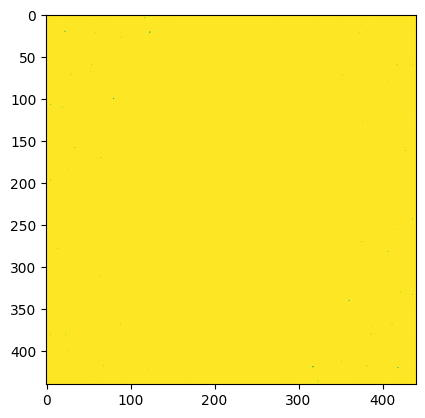

In [ ]:
import scipy.fftpack as fftpack
def ilustrativowiener_filter_2d(image, noise_variance):
    image_power_spectrum = np.abs(image) ** 2

    wiener_filter = image_power_spectrum / (image_power_spectrum + noise_variance)
    filtered_image = image * wiener_filter
    return wiener_filter

plt.imshow(wiener_filter_2d(Seccion1transf,snr1))


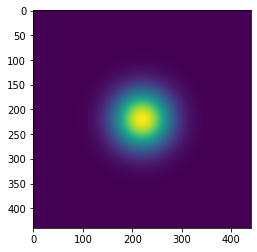

In [ ]:
#Definimos la gausiana
nx = np.shape(Seccion1transf)[0]
ny = np.shape(Seccion1transf)[1]
lx = np.arange(nx)
ly = np.arange(ny)
[xx,yy] = np.meshgrid(lx,ly)
sigma=40
x0=nx/2 
y0=ny/2 
gausiana = np.exp(-0.5*((xx-x0)**2+(yy-y0)**2)/sigma**2)
plt.figure(figsize = (4,4))
plt.imshow(gausiana)

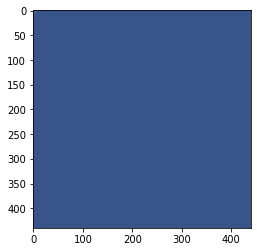

In [ ]:
mu = 200  # parámetro de la distribución de Poisson
alpha = 20  # factor de escala para ajustar la amplitud de la distribución

lx = np.arange(np.shape(seccion1)[0])
ly = np.arange(np.shape(seccion1)[1])
[xx, yy] = np.meshgrid(lx, ly)
poisson = alpha * np.exp(-mu) * mu**(xx+yy) / (factorial(xx) * factorial(yy))
plt.figure(figsize = (4,4))
plt.imshow(poisson)

In [ ]:
import cv2
import numpy as np

# Paso 1: cargar la imagen
img =seccion1


# Paso 2: aplicar la transformada de Fourier
f = np.fft.fft2(img)

# Paso 3: aplicar el filtro de Poisson en el dominio de la frecuencia
rows, cols = img.shape
k = np.zeros((rows, cols))
k[0, 0] = -4
k[0, 1] = 1
k[0, -1] = 1
k[1, 0] = 1
k[-1, 0] = 1
f_poisson = f / (1 - 0.25*np.fft.ifft2(k))



La matriz k se utiliza para representar el filtro de Poisson en el dominio de la frecuencia. 
El filtro de Poisson se basa en la Laplaciana de la imagen, que se puede aproximar utilizando
una matriz de convolución. La matriz k se utiliza para calcular la transformada de Fourier inversa del filtro de Poisson.
# Paso 4: aplicar la transformada inversa de Fourier
img_poisson = np.fft.ifft2(f_poisson).real

# Paso 5: normalizar la matriz resultante
poisson_norm = cv2.normalize(img_poisson, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Paso 6: guardar la imagen filtrada en el disco

plt.imshow(poisson_norm, cmap='gray')


SyntaxError: ignored

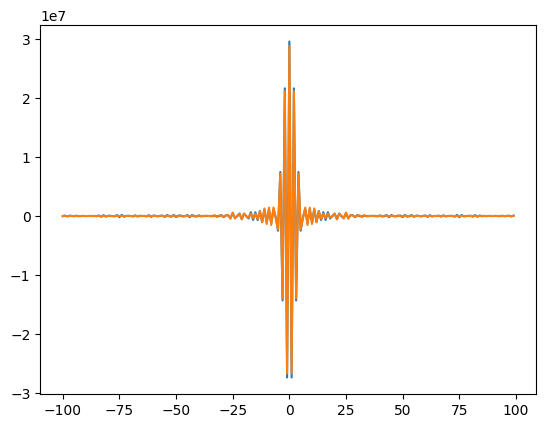

NameError: ignored

In [ ]:
#Antes de aplicar filtro

H,W = np.shape(Seccion1transf)
hW, hH = 600, 300
mW = int(np.fix(0.5*W))   # Entero que vale, aproximadamente, la mitad de W
mH = int(np.fix(0.5*H))   # Entero que vale, aproximadamente, la mitad de H

plt.plot(range(-100,100),Seccion1transf[mH,mW-100:mW+100]) #otra posibilidad
plt.plot(range(-100,100),Seccion2transf[mH,mW-100:mW+100]) #otra posibilidad
plt.show()

# Calcular la potencia de la señal y del ruido
signal_power = np.sum(np.abs(Seccion1transf[mH,mW-100:mW+100]) ** 2) / len(Seccion1transf[mH,mW-100:mW+100])
noise_power = np.sum(np.abs(Seccion3transf[mH,mW-100:mW+100]) ** 2) / len(Seccion3transf[mH,mW-100:mW+100])

# Calcular la SNR
snr1 = signal_power / noise_power
print("SNR =", snr)


#Después de aplicar filtro
plt.plot(range(-100,100),Seccion1filtr[mH,mW-100:mW+100]) #otra posibilidad
plt.plot(range(-100,100),Seccion3filtr[mH,mW-100:mW+100]) #otra posibilidad
plt.show()

# Calcular la potencia de la señal y del ruido
signal_power2 = np.sum(np.abs(Seccion1filtr[mH,mW-100:mW+100]) ** 2) / len(Seccion1transf[mH,mW-100:mW+100])
noise_power2 = np.sum(np.abs(Seccion3filtr[mH,mW-100:mW+100]) ** 2) / len(Seccion3transf[mH,mW-100:mW+100])

# Calcular la SNR
snr2 = signal_power2 / noise_power2
print("SNR =", snr)

In [ ]:
lx = np.arange(np.shape(Seccionbaja.pixel_array)[0])
ly = np.arange(np.shape(Seccionbaja.pixel_array)[1])
[xx,yy] = np.meshgrid(lx,ly)
sigma=8
x0=200
y0=200
gausiana = np.exp(-0.5*((xx-x0)**2+(yy-y0)**2)/sigma**2)


(A pesar de que de momento no funcione, probaremos a extra

In [ ]:

# Seleccionamos las imágenes
#Perfiles = [Secciones[0],Secciones[1],Secciones[2],Secciones4[0],Secciones4[1],Secciones4[2]]
# Seleccionar los puntos que definen la línea recta sobre la imagen
x1, y1 = 50, 50
x2, y2 = 200, 200

# Generar un arreglo de coordenadas para la línea recta
x_values = np.linspace(x1, x2, num=300, endpoint=True)
y_values = np.linspace(y1, y2, num=300, endpoint=True)

# Extraer los valores de intensidad de los píxeles a lo largo de la línea recta
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), squeeze=True)
for i, imagen in enumerate(Seccionfiltrim):
    intensidades = [imagen[int(round(y))][int(round(x))] for x, y in zip(x_values, y_values)]
    
# Graficar el perfil de intensidad
  
    row = 1
    #i // 3
    col = i % 3
    axs[row, col].imshow(intensidades, cmap=plt.cm.gray)
    #axs[row, col].axis('off')
    plt.colorbar(mappable=axs[0, 0].images[0], ax=axs[row, col])
    
    ax.set_xlabel('Posición en la línea recta')
    ax.set_ylabel('Intensidad')
    plt.show()

    #plt.plot(range(-25,25),P1[hH,hW-25:hW+25]) otra posibilidad

In [ ]:
import matplotlib.pyplot as plt
Perfiles = [Secciones[0],Secciones[1],Secciones[2],Secciones4[0],Secciones4[1],Secciones4[2]]
for i, imagen in  enumerate(Perfiles):


# Definir las coordenadas x e y de los perfiles
 x = [50, 100, 150]  # Ejemplo de coordenadas x
 y = [200, 300, 400] # Ejemplo de coordenadas y

# Coordenadas del punto central
 x_central = imagen.shape[1] // 2
 y_central = imagen.shape[0] // 2

# Intensidad en el punto central
 intensidad_central = imagen[y_central, x_central]

# Crear los subplots
 fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10,4))

# Recorrer los perfiles y dibujarlos en los subplots correspondientes
 for i, (x0, y0) in enumerate(zip(x, y)):
     perfil = imagen[y0, :]
     perfil_normalizado = perfil / intensidad_central
     axs[i].plot(perfil_normalizado)
     axs[i].set_title(f"Perfil {i+1} (x={x0}, y={y0})")
     axs[i].set_xlabel("Posición en x")
     axs[i].set_ylabel("Intensidad normalizada")
    
# Ajustar los subplots para que no se solapen
 plt.tight_layout()

# Mostrar la figura
 plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pydicom
from pydicom.data import get_testdata_files
#filename = get_testdata_files("Rodajarandom.IMA")[0]
dsmedia = pydicom.dcmread("A1dosefulln200.IMA")
A1=dsmedia.pixel_array
dsmedia = pydicom.dcmread("A1dose120n200.IMA")
A2=dsmedia.pixel_array

plt.imshow(A1) #cmap) 

In [ ]:
ALL = np.stack((A1,A2,A3),axis=2)
ALL.shape()

In [ ]:
# using subplot y loop puedes ver todas imagenes
for i in range(np.shape(ALL)[2]):
  plt.subplot()
  plt.imshow(ALL[100:350,100:350,i])

In [ ]:
H,W = np.shape(dsmedia.pixel_array)
F3 = fft2(dsmedia.pixel_array)#/float(W*H)                          
F3 = fftshift(F3)
P3 = np.abs(F3)
plt.figure()
plt.imshow(np.log(P3));

In [ ]:
import matplotlib.pyplot as plt
import pydicom
from pydicom.data import get_testdata_files
#filename = get_testdata_files("Rodajarandom.IMA")[0]
dsalta = pydicom.dcmread("A1dosefulln200.IMA")
plt.imshow(dsalta.pixel_array) #cmap=plt.cm.bone) 

In [ ]:
H,W = np.shape(dsalta.pixel_array)
F3 = fft2(dsalta.pixel_array)#/float(W*H)                          
F3 = fftshift(F3)
P3 = np.abs(F3)
plt.figure()
plt.imshow(np.log(P3));

A continuación probaremos a aplicar un filtro gausiano a la imagen con mayor ruido en el espacio de frecuencias

In [ ]:
import cv2
H,W = np.shape(dsbaja.pixel_array)
F3 = fft2(dsbaja.pixel_array)#/float(W*H)                          
F3 = fftshift(F3)
P3 = np.abs(F3)
plt.figure()
plt.imshow(np.log(dst));

In [ ]:
lx = np.arange(np.shape(ALL)[0])
ly = np.arange(np.shape(ALL)[1])
[xx,yy] = np.meshgrid(lx,ly))
sigma=10
x0=200
y0=200
gausiana = np.exp(-0.5*((xx-x0)^2+(yy-y0)^2)/sigma^2)
plt.imshow(gausiana)
plt.colorbar()

Y ahora deshacemos la transformada

In [ ]:
 dst= np.fft.ifft2()
M3 = np.abs(dst).astype(np.uint8)
 plt.figure() 
plt.imshow(M3) 